# Project - 1

### Xichen Li, EE521 - Group 5

## Problem 16

Solve this problem numerically by discretizing the Schrodinger equation. Consider a potential:
$$ U(x)=   \left\{
\begin{array}{ll}
      U_{0}=400meV & x<0 \& x>L \\
      0 & 0<x<L \\
\end{array} 
\right.  $$
Take $L=8nm$. In solveing this problem make sure to include at least $12nm$ to the left of $x=0$ and to the right of $x=L$

a)Find the lowest two eigenvalues by discretizing the Schrodinger equation. Plot the corresponding eigenfunctions. Use a grid spacing of 0.08nm. 

b)Plot the lowest energy level as a function of grid spacing. Use grid spacings of 0.02nm, 0.04, 0.08, 0.12, 0.2, 0.4, 0.8, 1.6nm. Makeobservations and rationalize your results. Repeat the above for the second lowest energy level.

c) Plot the lowest energy as a fucntion of well width. Vary the wekk width from 1 to 12nm in units of 1nm. How do your results compare to that for a particle in a box? Fit the lowest energy level by an algebraic function.


### Solution

#### a) Find the lowest two eigenvalues by discretizing the Schrodinger equation. Plot the corresponding eigenfunctions. Use a grid spacing of 0.08nm

Below shows the code to solve for the eigenfunction and eigen values numerically.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
a=0.08e-9
L = 8e-9
L1= 12e-9

X = np.arange(-L1,L+L1,a)

def V(x): # Return the potential energy given the position of each grid element
    if x<0 or x >L :
      result = 400e-3 * 1.6e-19
    else:
      result = 0
    return result 

eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s
m = 9.11e-31   #Assuming the particle mass is equal to a free electron
q = 1.6e-19
N=len(X)
#print(len(X))

In [3]:


#print(X)

U=[]
U=np.array(U, dtype=float)

for x in X:
    U=np.append(U,V(x))

#print(U)

t = -eta**2 / (2 * m * a**2)
eps = -2*t + U
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian


In [4]:
vals, vecs = np.linalg.eig(H) # Solve for Eigen function and eigen values
#print(vals)
#print(vals.shape)
#print(vecs)
#print(vecs.shape)
order = np.argsort(vals) 
vals, vecs = vals[order], vecs[:, order] # sort the eigen value and eigen functions
#print(vals)
#print(vecs)
vecs = vecs.T # Transpose
vecs /= np.sqrt(a) #Normalize
vals_eV=vals/1.6e-19
#print (vals_eV)
#print(vecs[0])
p = np.abs(vecs)**2
probs = a*p
#print(sum(probs[0]))
print ("The two lowest eigenvalues are are {:.4f}eV and {:.4f}eV".format(vals_eV[0], vals_eV[1]))


The two lowest eigenvalues are are 0.0051eV and 0.0202eV


The corresponding two eigenfunctions are plotted below:

<IPython.core.display.Javascript object>


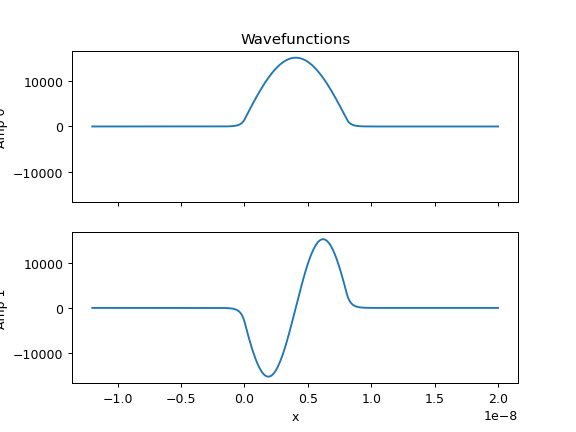

E_0 = 0.0051
E_1 = 0.0202


Text(0.5, 0, 'x')

In [5]:
fig, axes = plt.subplots(2, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions')
for i, (ax, Amp, E) in enumerate(zip(axes, vecs, vals_eV)):
    plt.sca(ax)
    plt.ylabel('Amp {}'.format(i))
    plt.plot(X, Amp)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

#### b) Plot the lowest energy level as a function of grid spacing. Use grid spacings of 0.02nm, 0.04, 0.08, 0.12, 0.2, 0.4, 0.8, 1.6nm. Make observations and rationalize your results. Repeat the above for the second lowest energy level.

In [6]:
L = 8e-9
L1= 12e-9
def V(x): # Return the potential energy given the position of each grid element
    if x<0 or x >L :
      result = 400e-3 * 1.6e-19
    else:
      result = 0
    return result 


a1= [0.02e-9, 0.04e-9, 0.08e-9, 0.12e-9, 0.2e-9, 0.4e-9, 0.8e-9, 1.6e-9] 
E0=[]
E1=[]

# a=0.08e-9
for a in a1:
  X = np.arange(-L1,L+L1,a)
  N=len(X)
  U=[]
  U=np.array(U, dtype=float)

  for x in X:
    U=np.append(U,V(x))
  t = -eta**2 / (2 * m * a**2)
  eps = -2*t + U
  H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian
  vals, vecs = np.linalg.eig(H) # Solve for Eigen function and eigen values
  order = np.argsort(vals) 
  vals, vecs = vals[order], vecs[:, order] # sort the eigen value and eigen functions
  vecs = vecs.T # Transpose
  vecs /= np.sqrt(a) #Normalize
  vals_eV=vals/1.6e-19
  E0=E0+[vals_eV[0]]
  E1=E1+[vals_eV[1]]

print(E0)
print(E1)


[0.005073615446749187, 0.005072419305533011, 0.005067656367299327, 0.005013237617685236, 0.005035237987946931, 0.0049304936920714386, 0.004614331960017129, 0.003909161928297153]
[0.020275278957523894, 0.02026984598204789, 0.020248201070170706, 0.02002677755214032, 0.020100409270492205, 0.019617680643017298, 0.018120928837755568, 0.014648835923554152]


<IPython.core.display.Javascript object>


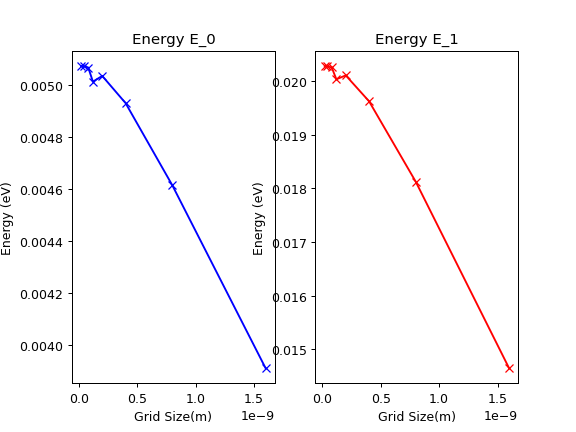

Text(0, 0.5, 'Energy (eV)')

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)

plt.sca(ax1)
plt.title('Energy E_0')
plt.plot(a1, E0, color='b', ls='-', marker='x')
plt.xlabel('Grid Size(m)')
plt.ylabel('Energy (eV)')

plt.sca(ax2)
plt.title('Energy E_1')
plt.plot(a1, E1, color='r', ls='-', marker='x')
plt.xlabel('Grid Size(m)')
plt.ylabel('Energy (eV)')

From the two figures above, we can see as we reduce the grid size and increase the number of discretization points, the two lowest eigenvalues converge to $0.005eV$ and $0.02eV$, respectively. This also implies that when the grid size is smaller than $0.2nm$, we can trust the calculated eigenvalue and eigenfunctions.

#### c)Plot the lowest energy as a fucntion of well width. Vary the well width from 1 to 12nm in units of 1nm. How do your results compare to that for a particle in a box? Fit the lowest energy level by an algebraic function


In [8]:
L1= 12e-9
def V1(x,L): # Return the potential energy given the position of each grid element
    if x<0 or x >L :
      result = 400e-3 * 1.6e-19
    else:
      result = 0
    return result 


a= 0.08e-9 
E0=[]
Lv=np.arange(1e-9,13e-9,1e-9)

for L in Lv:
  X = np.arange(-L1,L+L1,a)
  N=len(X)
  U=[]
  U=np.array(U, dtype=float)

  for x in X:
    U=np.append(U,V1(x,L))
  t = -eta**2 / (2 * m * a**2)
  eps = -2*t + U
  H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian
  vals, vecs = np.linalg.eig(H) # Solve for Eigen function and eigen values
  order = np.argsort(vals) 
  vals, vecs = vals[order], vecs[:, order] # sort the eigen value and eigen functions
  vecs = vecs.T # Transpose
  vecs /= np.sqrt(a) #Normalize
  vals_eV=vals/1.6e-19
  E0=E0+[vals_eV[0]]

print (E0)

[0.14235126222875452, 0.05415065372101815, 0.029226571218760256, 0.01759864456822576, 0.012077950198808182, 0.0085868501116048, 0.0065519494726335, 0.005067656367299327, 0.004103581135303031, 0.003339660919958586, 0.0028091472391597464, 0.0023654135652300986]


In [9]:
n=0
U0=0.4*1.6e-19
E0_pib=(eta**2/(2*m)*(n*np.pi/Lv)**2+U0)/1.6e-19
print(E0_pib)



[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]


<IPython.core.display.Javascript object>


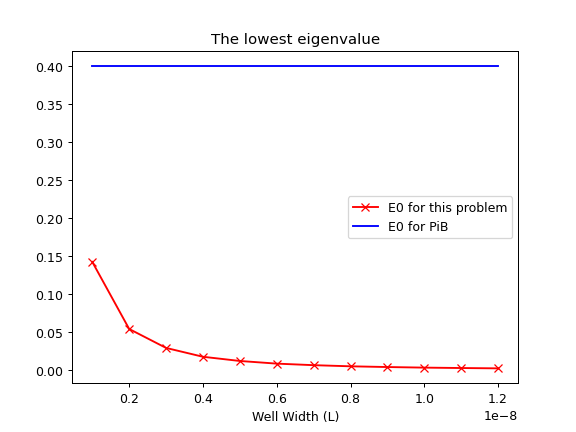

Text(0.5, 0, 'Well Width (L)')

In [10]:
plt.figure()
plt.plot(Lv, E0, color='r', ls='-', marker='x')
plt.plot(Lv, E0_pib, color='b', ls='-', marker='')
plt.legend(['E0 for this problem', 'E0 for PiB'])
plt.title('The lowest eigenvalue')
plt.xlabel('Well Width (L)')


The lowest energy for a particle in a box ($E_{0,pib}$) is equal to $U_0$ which is $0.4eV$. As we can tell from the figure above, the lowest energy in this well is smaller than a parctile in a box. 

In [14]:
#from scipy.optimize import curve_fit
#def test(x, a, b):
#    return a/x**2+b
#param, param_cov = curve_fit(test, Lv, E0)
#print(param)

In [15]:
#E0_fit=test(Lv,param[0],param[1])
#plt.figure()
#plt.plot(Lv, E0, color='r', ls='-', marker='x')
#plt.plot(Lv, E0_fit, color='b', ls='-', marker='')
#plt.legend(['Calculated Energy', 'Fitted Energy'])
#plt.title('The lowest eigenvalue (E_0)')
#plt.xlabel('Well Width (L)')